# Final Workshop

### Preprocessing

In [2]:
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn import ensemble
#from sklearn import linear_model

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Read in csv data
path_name = 'data/covtype.csv'
forest_data = pd.read_csv(path_name)

In [4]:
# separate the target feature in an array `y` and drop it from the rest of the data `X`
y = forest_data['Cover_Type']
X = forest_data.drop(['Cover_Type'] , axis = 1)
labels = X.columns

Since today we will not just train a model but also adjust and look for good hyperparameters, we split the data set in a training set, a validation set for hyperparameter tuning and a test set. The test set will be used in the end to measure the performance of our final model. We suggest a 70/15/15 split. 

**Task:** Make sets X_train, X_val, X_test and y_train, y_val, y_test

In [5]:
# test (incl. validation set) and training set split
X_train, X_test_plus_val, y_train, y_test_plus_val = train_test_split(X, y, test_size = 0.30, random_state=42)


# split between test and validation set
X_val, X_test, y_val, y_test = train_test_split(X_test_plus_val, y_test_plus_val, test_size = 0.5, random_state=42)

print(X_train.shape, X_test_plus_val.shape, X_val.shape)

(406708, 54) (174304, 54) (87152, 54)


## Decision Trees

The goal of todays notebook is to classify the cover type of a given instance as in the forest data set. As a model we will use a decision tree. We recomend to use the sklearn library. [Here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) you can find out more. Below you can see all the different parameters with their default value in form of a dictionary, although we do not need to specify or change most of them. Let's start with a simple tree with maximal depth 2.
For comparibility and reproducability we will set the random_state to 1.

In [6]:
params = {
    'criterion': 'gini', # {“gini”, “entropy”}, default=”gini”
    'splitter': 'best', # {“best”, “random”}, default=”best”
    'max_depth': None, # int, default=None
    'min_samples_split': 2, # int or float, default=2
    'min_samples_leaf': 1, # int or float, default=1
    'min_weight_fraction_leaf': 0.0, # float, default=0.0
    'max_features': None, # int, float or {“auto”, “sqrt”, “log2”}, default=None
    'random_state': None, # int, RandomState instance or None, default=None
    'max_leaf_nodes': None, # int, default=None
    'min_impurity_decrease': 0.0, # float, default=0.0
    'class_weight': None, # dict, list of dict or “balanced”, default=None
    'ccp_alpha': 0.0 # non-negative float, default=0.0
}

In [7]:
# first simple decision tree with parameters mentioned above

params['random_state'] = 1
params['max_depth'] = 2

dtc = DecisionTreeClassifier(**params)
dtc.fit(X_train, y_train)
print("Train accuracy: ",  dtc.score(X_train, y_train), "Validation accuracy: ", dtc.score(X_val, y_val))

Train accuracy:  0.6704687392428966 Validation accuracy:  0.6685560859188544


For a better understanding we can take a look at the tree structure:

depth:  2


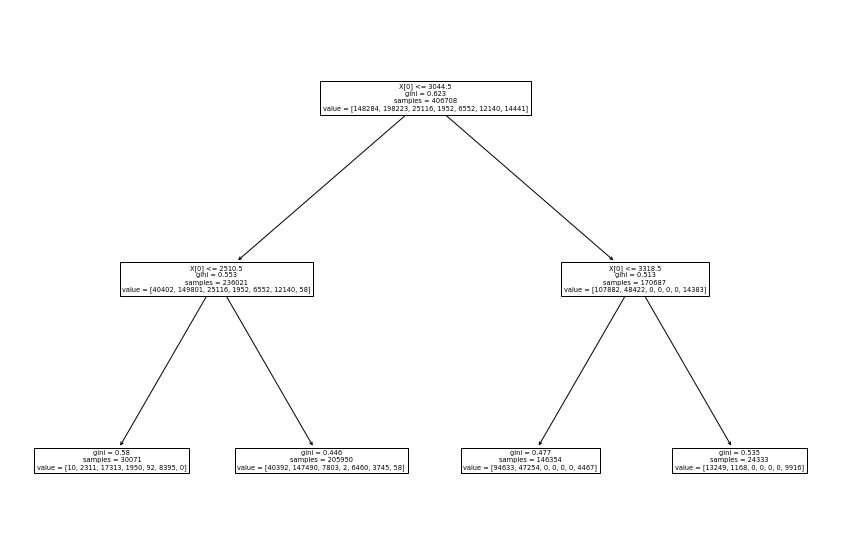

In [8]:
# Let's find out the actual depth of our tree:
print("depth: ", dtc.get_depth())

# and also have a look at the structure itself:
plt.figure(figsize=(15, 10))
tree.plot_tree(dtc);
plt.show()

We can also find out how large the contribution of individual features is for our decision tree, i.e. the feature importance, and visualize it afterwards (the plot idea is from [here](https://www.datacamp.com/community/tutorials/random-forests-classifier-python))

In [9]:
feature_imp = pd.Series(dtc.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Elevation                             1.0
Soil_Type27                           0.0
Soil_Type16                           0.0
Soil_Type17                           0.0
Soil_Type18                           0.0
Soil_Type19                           0.0
Soil_Type20                           0.0
Soil_Type21                           0.0
Soil_Type22                           0.0
Soil_Type23                           0.0
Soil_Type24                           0.0
Soil_Type25                           0.0
Soil_Type26                           0.0
Soil_Type28                           0.0
Aspect                                0.0
Soil_Type29                           0.0
Soil_Type30                           0.0
Soil_Type31                           0.0
Soil_Type32                           0.0
Soil_Type33                           0.0
Soil_Type34                           0.0
Soil_Type35                           0.0
Soil_Type36                           0.0
Soil_Type37                       

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


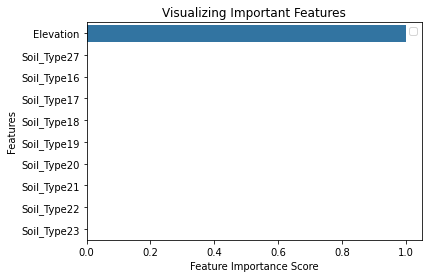

In [10]:
# visualizing the top ten
sns.barplot(x=feature_imp.iloc[:10], y=feature_imp.iloc[:10].index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

We can see that it only uses one single feature to predict the cover type. Also the validation accuracy is not yet where we want it to be. Since the training accuracy is also still quite low, we can assume that our model is underfitting, e.g. the model is not complex enough to represent the given distribution. 
Let's adjust our hyperparameters to find a better model. 

## Hyperparameter Search

In generell there are many different ways to find good hyperparameters for your model. As an example we will be using grid search today ([Here](https://towardsdatascience.com/hyperparameters-optimization-526348bb8e2d) you can read into several other methoods).

The idea behind grid search is that specific combinations of hyperparameters might work especially well together. That is why we are not just adjusting one parameter after another to find the best model, but instead test each of the possible combinations. So we train our model repeatedly on a grid of parameters.

Something we need to consider before starting to test and train an infinite number of models, is that we only have limited computational resources and time. So, we have to make a selection of parameters and also of intervals/values we want to look at beforehand.

**Task:** try to set up/do a grid search for two selected parameters and as many combinations that you train around 40 models in order to find better parameters

Train accuracy:  0.9962356285098891 Val accuracy:  0.9342872223242151 criterion:  gini max_depth:  30
Train accuracy:  0.9980059403798303 Val accuracy:  0.9344363870020195 criterion:  gini max_depth:  32
Train accuracy:  0.9986698073310581 Val accuracy:  0.9345970258858087 criterion:  gini max_depth:  33
Train accuracy:  0.9991517255623199 Val accuracy:  0.9346199742977785 criterion:  gini max_depth:  34
Train accuracy:  0.9994787415049617 Val accuracy:  0.9352625298329356 criterion:  gini max_depth:  35
Train accuracy:  0.9996926541892464 Val accuracy:  0.9353543234808152 criterion:  gini max_depth:  36
Train accuracy:  0.9999483659037934 Val accuracy:  0.9356411786304387 criterion:  gini max_depth:  38
Train accuracy:  0.9993631794801184 Val accuracy:  0.9406554066458601 criterion:  entropy max_depth:  30
Train accuracy:  0.9996779015903302 Val accuracy:  0.9413782816229117 criterion:  entropy max_depth:  31
Train accuracy:  0.9999926237005419 Val accuracy:  0.9417569304204149 criter

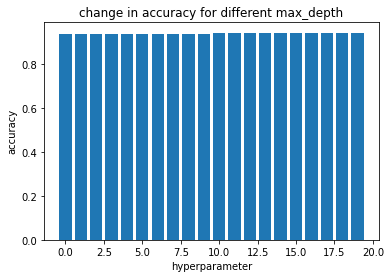

In [11]:
params = {
    'criterion': 'entropy', # {“gini”, “entropy”}
    'splitter': 'best', # {“best”, “random”}
    'max_depth': 38, # int
    'min_samples_split': 2, # int or float
    'min_samples_leaf': 1, # int or float, default=1
    'min_weight_fraction_leaf': 0.0, # float, default=0.0
    'max_features': None, # int, float or {“auto”, “sqrt”, “log2”}, default=None
    'random_state': 1, # int, RandomState instance or None, default=None
    'max_leaf_nodes': None, # int, default=None
    'min_impurity_decrease': 0.0, # float, default=0.0
    'class_weight': None, # dict, list of dict or “balanced”, default=None
    'ccp_alpha': 0.0 # non-negative float, default=0.0
}

# simple grid search between criterion and max_depth

accuracy = []
cur_best = 0

for l in ['gini', 'entropy']:
    params['criterion'] = l
    for k in range(30, 40):
        params['max_depth'] = k
        dtc = DecisionTreeClassifier(**params)
        dtc.fit(X_train, y_train)
        accuracy.append(dtc.score(X_val, y_val))
        if accuracy[len(accuracy)-1] > cur_best:
            print("Train accuracy: ", dtc.score(X_train, y_train), "Val accuracy: ", dtc.score(X_val, y_val), "criterion: ", l, "max_depth: ", k)
            cur_best = accuracy[len(accuracy)-1]

        
plt.bar(range(len(accuracy)), accuracy)
plt.xlabel('hyperparameter')
plt.ylabel('accuracy')
plt.title('change in accuracy for different max_depth')
plt.show();

In [19]:
# So the best accuracy of 0.9416995593904902 is achieved by criterion=entropy and max_depth=36
params = {
    'criterion': 'entropy', # {“gini”, “entropy”}
    'max_depth': 36, # int
    'random_state': 1, # int, RandomState instance or None, default=None
}


dtc = DecisionTreeClassifier(**params)
dtc.fit(X_train, y_train)
print("Train accuracy: ",  dtc.score(X_train, y_train), "Validation accuracy: ", dtc.score(X_val, y_val))

Train accuracy:  0.9999926237005419 Validation accuracy:  0.9417569304204149


Lets have again a look at some stats of our tree

In [20]:
print("depth: ", dtc.get_depth())
print("number of nodes: ", dtc.tree_.node_count)

depth:  36
number of nodes:  39199


In [21]:
feature_imp = pd.Series(dtc.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Elevation                             0.417047
Horizontal_Distance_To_Roadways       0.130498
Horizontal_Distance_To_Fire_Points    0.126819
Horizontal_Distance_To_Hydrology      0.052291
Vertical_Distance_To_Hydrology        0.040047
Hillshade_Noon                        0.027386
Aspect                                0.025654
Hillshade_9am                         0.023594
Wilderness_Area1                      0.023267
Hillshade_3pm                         0.020758
Slope                                 0.013712
Soil_Type32                           0.007630
Soil_Type4                            0.007409
Soil_Type23                           0.007031
Wilderness_Area3                      0.006851
Soil_Type29                           0.005881
Soil_Type22                           0.005444
Soil_Type39                           0.005277
Soil_Type2                            0.005260
Wilderness_Area2                      0.004601
Soil_Type10                           0.004323
Soil_Type38  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


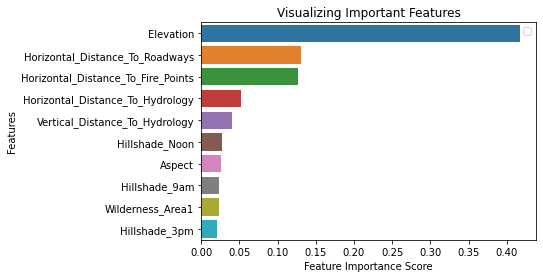

In [22]:
# visualizing top ten
sns.barplot(x=feature_imp.iloc[:10], y=feature_imp.iloc[:10].index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

We can see now, that much more features are used in the decision process. Since our tree is quite huge with over 40 thousand nodes, it does not make sense to plot it. If you are interested, you can check [here](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py) for other methods, which will give you even more insights into your tree.

## Random Forests
(decision trees with bagging)

After using a decision tree model and achieving an accuracy of over 94%, we want to try out a different model with random forests and see if we can achieve an even better score. Random forests are just a set of several decision trees of which we take a majority vote at the end to classify our data (this ensemble method is called bagging). In many cases this can help against overfitting. You can find out more about them [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

Below you can again see all the different parameters with their default value in form of a dictionary. Let's start with a simple random forest with 30 estimators, entropy as criterion and maximal depth 5.
For comparibility and reproducability we will set the random_state again to 1.

In [23]:
params = {
    'n_estimators': 74, #int, default=100
    'criterion': 'gini', #{“gini”, “entropy”}, default=”gini”
    'max_depth': 25, #int, default=None
    'min_samples_split': 2, #int or float, default=2
    'min_samples_leaf': 1, #int or float, default=1
    'min_weight_fraction_leaf': 0.0, #float, default=0.0
    'max_features': 'auto', #{“auto”, “sqrt”, “log2”}, int or float, default=”auto”
    'max_leaf_nodes': None, #int, default=None
    'min_impurity_decrease': 0.0, #float, default=0.0
    'bootstrap': True, #bool, default=True
    'oob_score': False, #bool, default=False
    'n_jobs': None, #int, default=None
    'random_state': None, #int, RandomState instance or None, default=None
    'verbose': 0, #int, default=0
    'warm_start': False, #bool, default=False
    'class_weight': None, #{“balanced”, “balanced_subsample”}, dict or list of dicts, default=None
    'ccp_alpha': 0.0, #non-negative float, default=0.0
    'max_samples': None #int or float, default=None
}

In [24]:
params['n_estimators'] = 30
params['criterion'] = 'entropy'
params['max_depth'] = 5
params['random_state'] = 1

rfc = ensemble.RandomForestClassifier(**params)
rfc.fit(X_train, y_train)
rfc.score(X_val, y_val)

0.6768175142280154

**Task:** Again it's your turn to set up a small grid search for a random forest using two parameters and about 10 to 20 combinations

Train accuracy:  0.997733017299881 Val accuracy:  0.9411373232972279 n_estimators:  10 max_depth:  50
Train accuracy:  0.9991541843288059 Val accuracy:  0.9456237378373417 n_estimators:  15 max_depth:  50


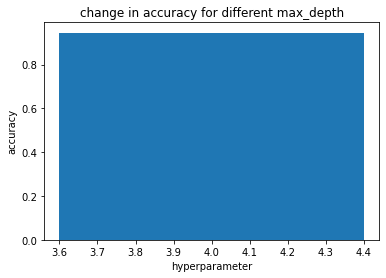

In [28]:
# grid search between n_estimators and max_depth
params = {
    'n_estimators': 200,
    'max_depth': 23,
    'criterion': 'entropy',
    'random_state':1,
}


accuracy = []
cur_best = 0

for l in [10, 15]:
    params['n_estimators'] = l
    for k in range(50, 52):
        params['max_depth'] = k
        rfc = ensemble.RandomForestClassifier(**params)
        rfc.fit(X_train, y_train)
        accuracy.append(rfc.score(X_val, y_val))
        if accuracy[len(accuracy)-1] > cur_best:
            print("Train accuracy: ", rfc.score(X_train, y_train), "Val accuracy: ", rfc.score(X_val, y_val), "n_estimators: ", l, "max_depth: ", k)
            cur_best = accuracy[len(accuracy)-1]

        
plt.bar(len(accuracy), accuracy)
plt.xlabel('hyperparameter')
plt.ylabel('accuracy')
plt.title('change in accuracy for different max_depth')
plt.show();

Let's have a look a the best model we've found

In [29]:
# best model found
params = {
    'n_estimators': 146,
    'max_depth': 51,
    'criterion': 'entropy',
    'random_state':1,
}

rfc = ensemble.RandomForestClassifier(**params)
rfc.fit(X_train, y_train)
print("Train accuracy: ",  rfc.score(X_train, y_train), "Validation accuracy: ", rfc.score(X_val, y_val))

Train accuracy:  1.0 Validation accuracy:  0.9548948962731779


In [30]:
feature_imp = pd.Series(rfc.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Elevation                             0.261897
Horizontal_Distance_To_Roadways       0.108768
Horizontal_Distance_To_Fire_Points    0.098353
Horizontal_Distance_To_Hydrology      0.053923
Vertical_Distance_To_Hydrology        0.050287
Wilderness_Area4                      0.043008
Aspect                                0.042182
Hillshade_Noon                        0.037908
Hillshade_9am                         0.036386
Hillshade_3pm                         0.036221
Slope                                 0.029779
Wilderness_Area1                      0.025676
Soil_Type38                           0.015269
Soil_Type39                           0.014118
Soil_Type10                           0.014094
Wilderness_Area3                      0.013523
Soil_Type4                            0.013381
Soil_Type22                           0.010574
Soil_Type23                           0.008493
Soil_Type2                            0.008305
Soil_Type12                           0.008221
Soil_Type29  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


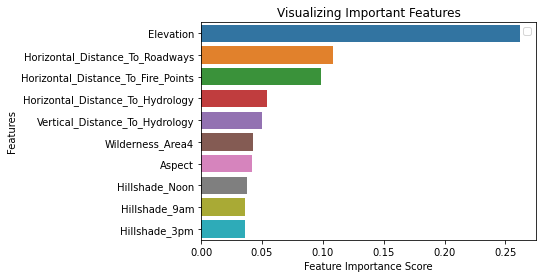

In [31]:
# visualizing top ten
sns.barplot(x=feature_imp.iloc[:10], y=feature_imp.iloc[:10].index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

And finally, let's have a lokk at our actual performance on the test set:

In [38]:
print("DecisionTree\n", "test accuracy:", dtc.score(X_test, y_test), "validation accuracy: ", dtc.score(X_val, y_val))
print("RandomForestClassifier\n", "test accuracy:", rfc.score(X_test, y_test), "validation accuracy: ", rfc.score(X_val, y_val))

DecisionTree
 test accuracy: 0.93961125390123 validation accuracy:  0.9417569304204149
RandomForestClassifier
 test accuracy: 0.9547113089774187 validation accuracy:  0.9548948962731779
